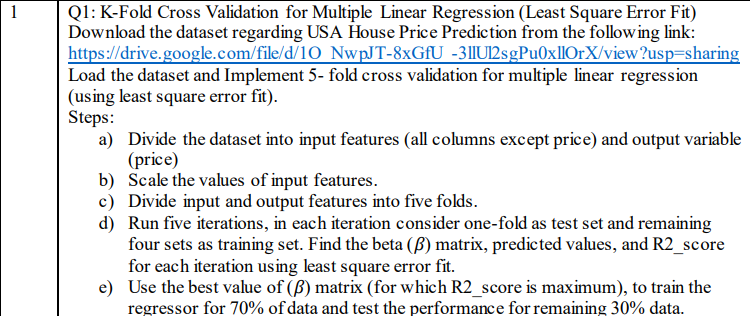

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("USA_Housing.csv")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


In [7]:
x = df.drop(columns = ['Price']).values
y = df['Price'].values
x

array([[7.95454586e+04, 5.68286132e+00, 7.00918814e+00, 4.09000000e+00,
        2.30868005e+04],
       [7.92486424e+04, 6.00289981e+00, 6.73082102e+00, 3.09000000e+00,
        4.01730722e+04],
       [6.12870672e+04, 5.86588984e+00, 8.51272743e+00, 5.13000000e+00,
        3.68821594e+04],
       ...,
       [6.33906869e+04, 7.25059062e+00, 4.80508098e+00, 2.13000000e+00,
        3.32661455e+04],
       [6.80013312e+04, 5.53438842e+00, 7.13014386e+00, 5.44000000e+00,
        4.26256202e+04],
       [6.55105818e+04, 5.99230531e+00, 6.79233610e+00, 4.07000000e+00,
        4.65012838e+04]])

In [13]:

from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score


In [11]:
kf = KFold(n_splits= 5, shuffle = True, random_state= 42)
betas, scores = [], []

In [16]:
for train_idx, test_idx in kf.split(x):
    X_train, X_test = x[train_idx], x[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    X_train_b = np.c_[np.ones(X_train.shape[0]), X_train]
    X_test_b = np.c_[np.ones(X_test.shape[0]), X_test]


    beta = np.linalg.pinv(X_train_b.T @ X_train_b) @ (X_train_b.T @ y_train)
    y_pred = X_test_b @ beta
    r2 = r2_score(y_test, y_pred)

    betas.append(beta)
    scores.append(r2)


best_beta = betas[np.argmax(scores)]
print("Fold R² scores:", scores)
print("Best β (coefficients):", best_beta)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train_b = np.c_[np.ones(X_train.shape[0]), X_train]
X_test_b = np.c_[np.ones(X_test.shape[0]), X_test]

y_pred = X_test_b @ best_beta
print("Final Test R² with best β:", r2_score(y_test, y_pred))

Fold R² scores: [0.9179971706985147, 0.9145677884802818, 0.9116116385364479, 0.9193091764960817, 0.9243869413350316, 0.9179971706985147, 0.9145677884802818, 0.9116116385364479, 0.9193091764960817, 0.9243869413350316]
Best β (coefficients): [1.23264148e+06 2.29893924e+05 1.64575094e+05 1.21797211e+05
 7.86135883e+02 1.50562056e+05]
Final Test R² with best β: 0.9147775974703933


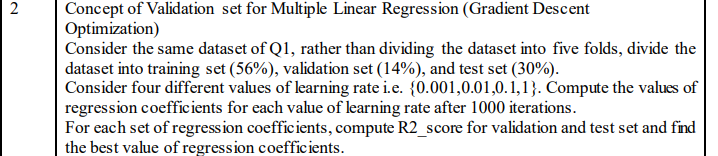

In [18]:
X_temp, X_test, y_temp, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

X_train_b = np.c_[np.ones(X_train.shape[0]), X_train]
X_val_b = np.c_[np.ones(X_val.shape[0]), X_val]
X_test_b = np.c_[np.ones(X_test.shape[0]), X_test]

def gradient_descent(X, y, lr, iters=1000):
    m, n = X.shape
    beta = np.zeros(n)
    for _ in range(iters):
        grad = (1/m) * X.T @ (X @ beta - y)
        beta -= lr * grad
    return beta

lrs = [0.001, 0.01, 0.1, 1]
results = {}

for lr in lrs:
    beta = gradient_descent(X_train_b, y_train, lr)
    r2_val = r2_score(y_val, X_val_b @ beta)
    r2_test = r2_score(y_test, X_test_b @ beta)
    results[lr] = {"beta": beta, "val_r2": r2_val, "test_r2": r2_test}

print("Results (learning rate → R²):")
for lr, res in results.items():
    print(f"LR={lr}: Validation R²={res['val_r2']:.4f}, Test R²={res['test_r2']:.4f}")


Results (learning rate → R²):
LR=0.001: Validation R²=-0.7993, Test R²=-0.9873
LR=0.01: Validation R²=0.9098, Test R²=0.9147
LR=0.1: Validation R²=0.9098, Test R²=0.9148
LR=1: Validation R²=0.9098, Test R²=0.9148


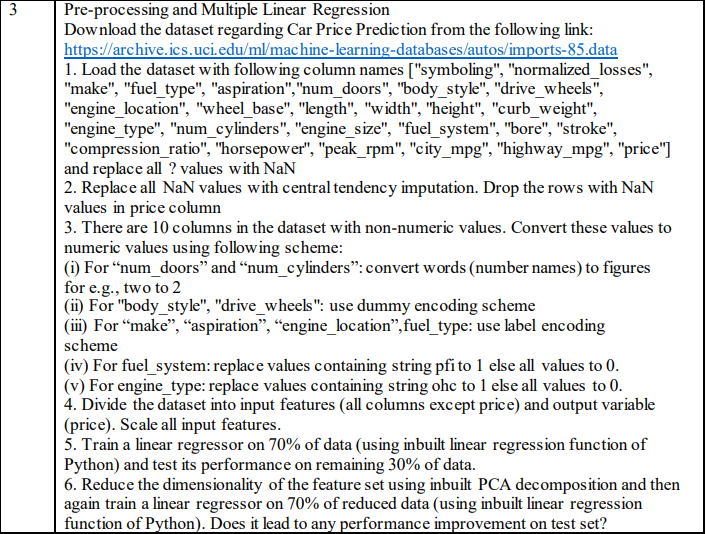

In [37]:
cols = ["symboling","normalized_losses","make","fuel_type","aspiration","num_doors",
        "body_style","drive_wheels","engine_location","wheel_base","length","width",
        "height","curb_weight","engine_type","num_cylinders","engine_size","fuel_system",
        "bore","stroke","compression_ratio","horsepower","peak_rpm","city_mpg","highway_mpg","price"]

df = pd.read_csv("car_price.csv", names=cols, na_values="?")

nan_counts = df.isna().sum()
column_names = nan_counts[nan_counts != 0]
print(column_names)






normalized_losses    41
num_doors             2
bore                  4
stroke                4
horsepower            2
peak_rpm              2
price                 4
dtype: int64


In [38]:
for col in column_names.index:
    df[col] = df[col].fillna(df[col].median())
    


TypeError: Cannot convert ['two' 'two' 'two' 'four' 'four' 'two' 'four' 'four' 'four' 'two' 'two'
 'four' 'two' 'four' 'four' 'four' 'two' 'four' 'two' 'two' 'four' 'two'
 'two' 'two' 'four' 'four' 'four' nan 'four' 'two' 'two' 'two' 'two' 'two'
 'two' 'four' 'four' 'two' 'two' 'four' 'four' 'four' 'two' 'four' 'two'
 'four' 'two' 'four' 'four' 'two' 'two' 'two' 'two' 'four' 'four' 'two'
 'two' 'two' 'two' 'two' 'four' 'two' 'four' nan 'four' 'four' 'four'
 'four' 'four' 'two' 'four' 'four' 'two' 'four' 'two' 'two' 'two' 'two'
 'two' 'two' 'two' 'two' 'two' 'two' 'two' 'four' 'four' 'four' 'four'
 'two' 'two' 'two' 'four' 'four' 'two' 'two' 'four' 'four' 'two' 'four'
 'four' 'four' 'four' 'four' 'two' 'two' 'two' 'four' 'four' 'four' 'four'
 'four' 'four' 'four' 'four' 'four' 'four' 'four' 'two' 'two' 'four'
 'four' 'four' 'four' 'two' 'two' 'two' 'two' 'two' 'two' 'four' 'two'
 'two' 'four' 'two' 'four' 'two' 'four' 'two' 'two' 'two' 'four' 'four'
 'four' 'four' 'four' 'four' 'four' 'four' 'four' 'two' 'two' 'four'
 'four' 'four' 'four' 'four' 'four' 'four' 'four' 'four' 'four' 'four'
 'two' 'two' 'two' 'two' 'two' 'two' 'two' 'two' 'two' 'two' 'four' 'four'
 'four' 'four' 'four' 'two' 'two' 'four' 'four' 'two' 'two' 'four' 'four'
 'four' 'four' 'four' 'two' 'two' 'four' 'four' 'four' 'four' 'four'
 'four' 'four' 'four' 'four' 'four' 'four' 'four' 'four' 'four'] to numeric